# TensorFlow

In [11]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [2]:
(Xtrain, _ytrain), (Xtest, _ytest) = mnist.load_data()

What do the numbers represent?
- **60,000** images (Numpy Arrays), where each image has
- **28** rows (i.e. height), and 
- **28** columns (i.e. width)

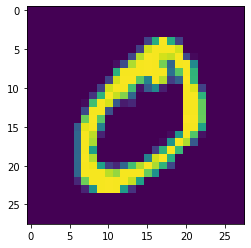

In [3]:
# plot a sample image
plt.imshow(Xtrain[1].reshape(28, 28))

### Data Preparation

we one-hot-encode y and flatten X:

In [4]:
Xtrain = Xtrain.reshape(60000, 28*28)
Xtest = Xtest.reshape(10000, 28*28)
ytrain = to_categorical(_ytrain)
ytest = to_categorical(_ytest)

In [5]:
ytrain.shape, ytest.shape

((60000, 10), (10000, 10))

### Defining the Model
    
- input shape is **super important**. The tuple defines the shape of a single data point. The network doesn't care how many data points it receives (it's going to get different number of data points during training and testing, anyways)
- the dense layers get their biases automatically. Keras handles this for us. weights are also initialized automatically (this is rarely necessary to change)


In [14]:
from tensorflow.keras.layers import BatchNormalization

In [24]:
K.clear_session()

model = Sequential([
    
    Dense(20, input_shape=(28 * 28,)),   # hidden layer
    Activation('sigmoid'),
    BatchNormalization(),
    Dense(200),                           # hidden layer
    Activation('sigmoid'),
    Dense(200),                           # hidden layer
    Activation('sigmoid'),
    Dense(200),                           # hidden layer
    Activation('sigmoid'),
    BatchNormalization(),
    Dense(10),                           # output layer
    Activation('softmax'),
])

In [25]:
# check layers and trainable parameters - good estimate of training time
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 200)               4200      
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0

### Compile and fit the Model
`compile()` lets TensorFlow create a *computation graph* a model representation that is platform-independent. 
This makes it possible to deploy a model on CPUs, GPUs, embedded systems, phones and web browsers.

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=3)

In [28]:
h = model.fit(Xtrain[:1000], ytrain[:1000], epochs=10, batch_size=500, callbacks=[callback], verbose=1, validation_split=0.2)
# verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/10
2/2 [==============================] - 1s 289ms/step - loss: 2.3632 - accuracy: 0.0957 - val_loss: 2.7135 - val_accuracy: 0.0800
Epoch 2/10
2/2 [==============================] - 0s 54ms/step - loss: 2.0547 - accuracy: 0.3920 - val_loss: 2.6944 - val_accuracy: 0.0800
Epoch 3/10
2/2 [==============================] - 0s 58ms/step - loss: 1.7930 - accuracy: 0.5195 - val_loss: 2.6784 - val_accuracy: 0.0800
Epoch 4/10
2/2 [==============================] - 0s 63ms/step - loss: 1.5890 - accuracy: 0.5375 - val_loss: 2.6639 - val_accuracy: 0.0800
Epoch 5/10
2/2 [==============================] - 0s 55ms/step - loss: 1.3951 - accuracy: 0.5955 - val_loss: 2.6499 - val_accuracy: 0.0800
Epoch 6/10
2/2 [==============================] - 0s 66ms/step - loss: 1.2415 - accuracy: 0.6280 - val_loss: 2.6351 - val_accuracy: 0.0800
Epoch 7/10
2/2 [==============================] - 0s 55ms/step - loss: 1.0974 - accuracy: 0.6687 - val_loss: 2.6204 - val_accuracy: 0.0800
Epoch 8/10
2/2 [==========

### Plot Learning Curve

In [ ]:
h.history.keys()

In [ ]:
# loss should go down over time
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [ ]:
# accuracy should go up over time
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

### Exercises

#### Exercise 1:

Add another hidden layer to the model and re-run the training. 

#### Exercise 3:

Change the activation of the hidden layers to `relu`

#### Exercise 3:

Add a Batch Normalization layer (a regularization technique) after the activation of the hidden layers.

    BatchNormalization(),
    
Re-run the training. Do you observe any changes?

#### Exercise 4:

Tune some of the other hyperparameters (number of neurons, epochs). Try to get an accuracy of 96% or better.

### Evaluate on test data

In [ ]:
#batch sizes here don't have to be the same size
score = model.evaluate(Xtest, ytest, batch_size=500)
print(score)

some useful features:
- model.summary() provides a really good overview of the model after you compile it.
- you can save and load models to JSON files using the h5py library (copy from class example)
- you can look at the model weights with model.get_weights()
    - but this is more interesting to look at within *TensorBoard*

### Save the model
the JSON file (containing the structure) and a H5 file (containing the parameters).

In [ ]:
# serialize model to JSON
with open("model.json", "w") as json_file:
    json_file.write(model.to_json())

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

### Reading the contents of the h5 file.

In [ ]:
import h5py
filename = "model.h5"
h5 = h5py.File(filename,'r')

# List all groups
print("Keys: {}\n".format(h5.keys()))
group_keys = list(h5.keys())
print(group_keys)

# Get the data
# data = list(h5[a_group_key])